In [1]:
%matplotlib inline
import chemical_evolution as chemevo
import nine_species_network as net9
import numpy as np
import matplotlib.pyplot as plt

In [2]:
species_info = net9.LoadingHook.load_species()
all_species = [
    chemevo.Species(name, 1, symbol=symbol)
    for name, symbol in species_info
]
HI, HII, HM, HeI, HeII, HeIII, H2I, H2II, de, gma, grn = [species.symbol for species in all_species]

In [3]:
reaction_info = net9.LoadingHook.load_reactions()
all_reactions = [
    chemevo.Reaction(eval(lhs), eval(rhs), rate=net9.HardCoded.calc_rate(1e5, i), rate_symbol=rate_symbol)
    for i, ((lhs, rhs), rate_symbol) in enumerate(reaction_info)
]

In [16]:
system = chemevo.ChemEvo(all_species, all_reactions)

In [17]:
y_hist = [system.y]

In [18]:
for i in range(10000):
    if i % 1000 == 0:
        print(i)
    system.update(1e3)
    y_hist.append(system.y)

0
1000
2000
3000
4000
5000
6000
7000
8000
9000


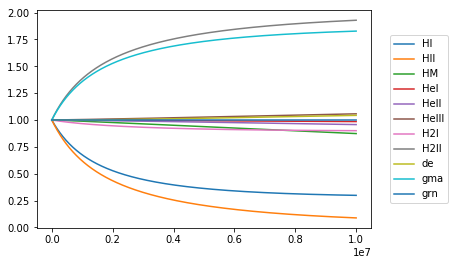

In [21]:
t = np.linspace(0, 10000000, 10001)
for i in range(11):
    plt.plot(t, [x[i] for x in y_hist], label=system.all_species[i].name)
plt.legend([species.name for species in system.all_species],
            bbox_to_anchor=(1.04, 0.5), loc="center left")
plt.xlabel('Time (s)')
plt.ylabel('')